## Spike Trains
Here I will show you what you can do with the loaded spike trains. I will show a number of options, which are not exhaustive, but should give you a good starting point.

### Imports
In addition to the modules imported last time, now we also import the histograms and quality_tests modules.
Since we will plot some stuff down the line, we also import matplotlib.pyplot,  spiketrain_plots and colour_template.

In [11]:
import numpy as np
from polarspike import Overview, histograms, quality_tests, spiketrain_plots, colour_template
import matplotlib.pyplot as plt
from bokeh.io import show


### Loading the spikes
This is a reminder of how to load the spikes. This is explained in more detail in Loading_spikes.ipynb.

In [3]:
recording = Overview.Recording.load(r"B:\Marvin\Zebrafish_04_23_2024\Phase_01\overview")
spikes = recording.get_spikes_triggered([[0]], [[0]])

We can plot these spikes using the spiketrain_plots module. The spikes_and_trace function plots the responses as raster plot and histogram on top.
In the most easy version, we can just call the function with the spikes as argument and set the indices argument to ["cell_index", "repeat"]. This means that each individual cells' responses and repeats are plotted separately.

In [10]:
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"])
show(fig)

You might notice, that we havent got any information about the stimulus plotted in this plot. We can add the stimulus by using the colour_template module. 
First we choose the stimulus template that we want to use. Then we add that template to the plot. 

In [13]:
CT = colour_template.Colour_template()
CT.pick_stimulus("FFF_6_MC")

<span style="font-family: monospace">#fe7c7c <span style="color: #fe7c7c">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span> <span style="font-family: monospace">#fafe7c <span style="color: #fafe7c">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span> <span style="font-family: monospace">#8afe7c <span style="color: #8afe7c">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span> <span style="font-family: monospace">#7cfcfe <span style="color: #7cfcfe">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span> <span style="font-family: monospace">#7c86fe <span style="color: #7c86fe">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span> <span style="font-family: monospace">#fe7cfe <span style="color: #fe7cfe">████</span></span> <span style="font-family: monospace">#000000 <span style="color: #000000">████</span></span>

The template will be previewed when we select a stimulus using "pick_stimulus". 
We can use the "add_stimulus_to_plot" method to add the stimulus to the plot based on which template we have choosen. <b> This only works for full field 
stimuli </b>. For plotting, we also need to provide the function with the duration of each stimulus epoch. Here, I just add 12*2 seconds as I know this is the duration. There is a way to do this programmatically, we will come to that later.

In [14]:
fig = CT.add_stimulus_to_plot(fig, [2] * 12)
show(fig)

## Histograms
On the top of the plot that we just created, we can see a histogram of the spikes. We can get the data of this histogram using the histograms module without having to plot the figure. Here is how:
1. If we just have a single cell, like in the example, we can use the "psth" function, which is straightforward.

In [16]:
psth, bins = histograms.psth(spikes, bin_size=0.01, start=0, end=24)

We can plot the results to check. Keep in mind that the first value in bins is the left edge of the first bin, and the last value is the right edge of the last bin.
This means, we have one more value in bins than in psth.

C:\Users\Marvin\AppData\Local\Temp\ipykernel_10060\3859948802.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


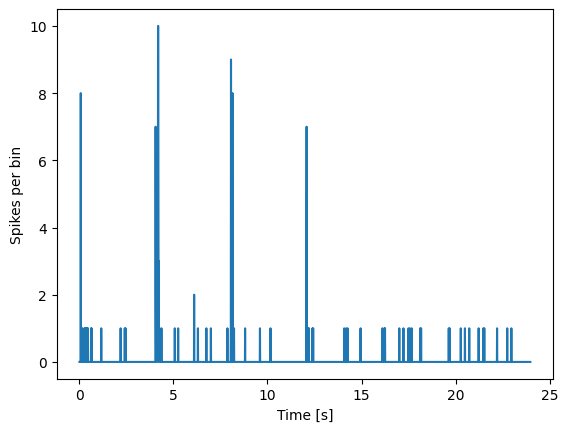

In [19]:
fig, ax = plt.subplots()
ax.plot(bins[:-1], psth)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Spikes per bin")
fig.show()

From here, we can do further analysis using the psth data if we want. We can also change the bin size, start and end time to get the data we want.

C:\Users\Marvin\AppData\Local\Temp\ipykernel_10060\3518861860.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


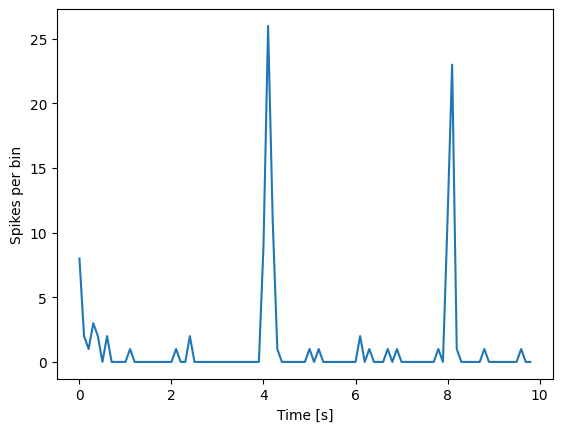

In [20]:
psth, bins = histograms.psth(spikes, bin_size=0.1, start=0, end=10)
fig, ax = plt.subplots()
ax.plot(bins[:-1], psth)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Spikes per bin")
fig.show()

Often we want to compare the responses of different cells. We can do this by using the psth_by_index function.

In [21]:
spikes = recording.get_spikes_triggered([[0]], [[0, 1, 2, 3, 4, 5]])

In [24]:
psth, bins, cells = histograms.psth_by_index(spikes, bin_size=0.01, index=["cell_index"], return_idx=True)

If we bin multiple cells, it is possible that a cell did not fire at all. In this case, <b> the function will not return anything for this cell.</b> Ideally, the function would return all bins == 0 for this cell, but because of how this function is implemented, this is not the case.
We can return the indices of the cells that did fire using the return_idx argument. This will return a list of the indices of the cells that did fire.

In [28]:
print(cells)

[[1]
 [4]
 [5]
 [0]
 [3]]


Lets plot the results to see what we have.

C:\Users\Marvin\AppData\Local\Temp\ipykernel_10060\2189421898.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


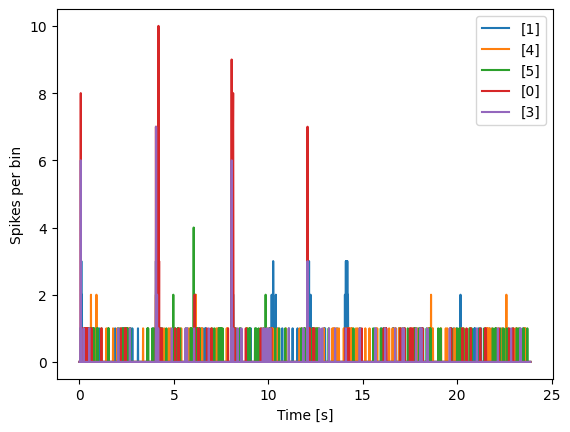

In [29]:
fig, ax = plt.subplots()
for i, p in enumerate(psth):
    ax.plot(bins[:-1], p, label=cells[i])
ax.legend()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Spikes per bin")
fig.show()

Or in subplots

C:\Users\Marvin\AppData\Local\Temp\ipykernel_10060\3636949845.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


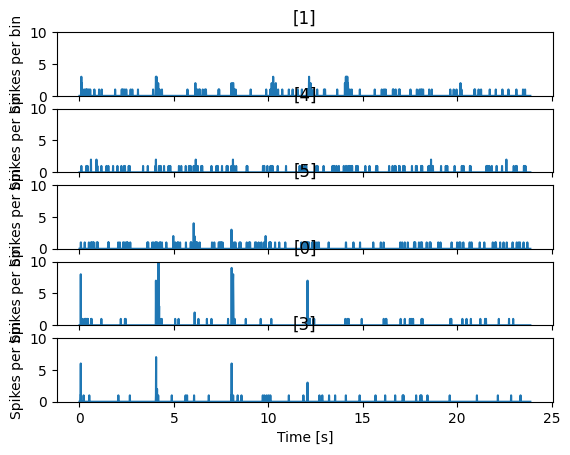

In [31]:
fig, axs = plt.subplots(len(psth), 1, sharex=True)
for i, p in enumerate(psth):
    axs[i].plot(bins[:-1], p)
    axs[i].set_ylabel("Spikes per bin")
    axs[i].set_title(cells[i])
axs[-1].set_xlabel("Time [s]")
for ax in axs:
    ax.set_ylim([0, np.max(psth)])
fig.show()

We can return the psth split further by other indices. For example, we can split by repeat.

In [33]:
psth, bins, cells_repeat = histograms.psth_by_index(spikes, bin_size=0.01, index=["cell_index", "repeat"],
                                                    return_idx=True)

In [35]:
print(cells_repeat)

[[0 3]
 [0 2]
 [5 7]
 [1 0]
 [1 6]
 [3 1]
 [5 1]
 [0 4]
 [4 7]
 [3 9]
 [0 0]
 [4 2]
 [1 3]
 [1 5]
 [0 6]
 [0 7]
 [4 3]
 [3 6]
 [5 3]
 [4 4]
 [0 9]
 [5 9]
 [4 1]
 [3 2]
 [5 2]
 [5 5]
 [4 9]
 [4 0]
 [0 1]
 [3 5]
 [5 8]
 [4 5]
 [1 8]
 [4 8]
 [1 4]
 [3 8]
 [5 0]
 [4 6]
 [3 3]
 [3 4]
 [5 4]
 [0 8]
 [0 5]
 [3 7]
 [3 0]
 [1 7]
 [1 1]
 [1 2]
 [5 6]
 [1 9]]


Now the indices array contains two columns. The first column is the cell index, the second column is the repeat index.
We can plot all cells split by repeat.


C:\Users\Marvin\AppData\Local\Temp\ipykernel_10060\3675068483.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


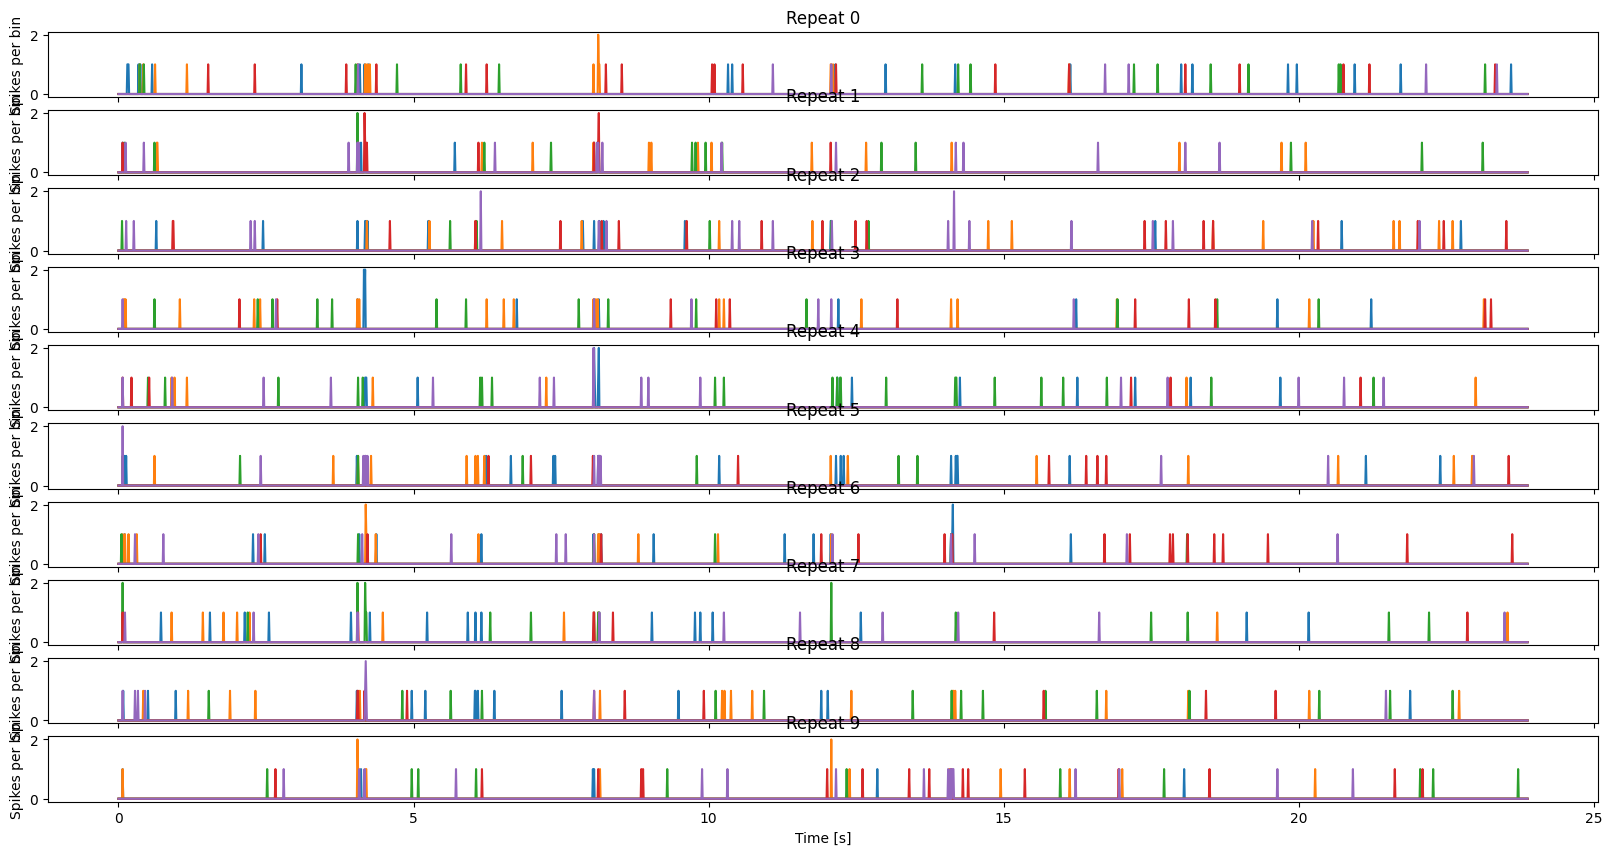

In [42]:
nr_repeat = len(np.unique(cells_repeat[:, 1]))
fig, axs = plt.subplots(nr_repeat, sharex=True, sharey=True, figsize=(20, 10))
for i in range(nr_repeat):
    psth_repeat = psth[cells_repeat[:, 1] == i]
    for j, p in enumerate(psth_repeat):
        axs[i].plot(bins[:-1], p, label=cells_repeat[cells_repeat[:, 0] == j])
    axs[i].set_ylabel("Spikes per bin")
    axs[i].set_title(f"Repeat {i}")
axs[-1].set_xlabel("Time [s]")

fig.show()

This might not be the most informative plot, but it shows how you can split the data by different indices and you could use this for further analysis.

## Quality tests
One of the analysis that we often do is to check the quality of the cells. We do this by comparing how consistent the responses are over multiple repeats.
In principle, we can calculate the quality index for each stimulus that has repeats. In practice, for long stimuli like noise, this is not feasible due to computational complexity and the fact that the stimulus history might change a cell's response over long time.

In [43]:
quality = quality_tests.spiketrain_qi(spikes, max_window=2 * 12, max_repeat=10)

In [44]:
print(quality)

                  qi
cell_index          
0           0.795554
1           0.193311
3           0.361878
4           0.115182
5           0.126302


Consistent with the plot above, we see that cells 0 and 3 seem to have the most consistent responses.

### Appendix
Often we need to provide the durations of stimulus episodes like flash durations to a function. We can extract this information by extracting it from the stimulus_df

In [45]:
from Overview import stimulus_spikes

In [47]:
mean_trigger_times = stimulus_spikes.mean_trigger_times(recording.stimulus_df, [0])
mean_trigger_times

array([2.0009675, 2.0009675, 2.0009675, 2.0009675, 2.0009675, 2.0009675,
       2.00097  , 2.00097  , 2.00097  , 2.00097  , 2.0009775, 2.0009775])

These are the mean trigger times, which means the trigger times averaged over all repeat. We can also get the max trigger times to check if a stimulus presentation was suprisingly long for example.

In [49]:
max_trigger_times = stimulus_spikes.max_trigger_times(recording.stimulus_df, [0])
max_trigger_times

array([2.001   , 2.001   , 2.000975, 2.000975, 2.000975, 2.000975,
       2.000975, 2.000975, 2.000975, 2.000975, 2.001   , 2.001   ])

If we subtract the mean trigger times from the max trigger times, we get the maximal different from the mean:

In [50]:
max_trigger_times - mean_trigger_times

array([3.25e-05, 3.25e-05, 7.50e-06, 7.50e-06, 7.50e-06, 7.50e-06,
       5.00e-06, 5.00e-06, 5.00e-06, 5.00e-06, 2.25e-05, 2.25e-05])

To get the mean duration of the whole stimulus, we just sum the mean trigger times.

In [51]:
np.sum(mean_trigger_times)

24.01164

Same could be done using the max trigger times.

In [52]:
np.sum(max_trigger_times)

24.0118

In most cases, both methods should give very similar results, otherwise the stimulus presentation might have been interrupted or something went wrong.

### Summary
This notebook showed you how to plot spike trains, histograms and quality tests. We also showed how to extract the durations of the stimulus epochs from the stimulus_df.

# End